# One-Sample T-Test

Um teste t de uma amostra verifica se a média da amostra difere da média populacional. Vamos criar alguns dados de idade fictícia para a população de eleitores em todo o país e uma amostra de eleitores em Minnesota e testar se a idade média dos eleitores Minnesota difere da população:

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

In [3]:

np.random.seed(6)

population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate((population_ages1, population_ages2))

minnesota_ages1 = stats.poisson.rvs(loc=18, mu=30, size=30)
minnesota_ages2 = stats.poisson.rvs(loc=18, mu=10, size=20)
minnesota_ages = np.concatenate((minnesota_ages1, minnesota_ages2))

print( population_ages.mean() )
print( minnesota_ages.mean() )

43.000112
39.26


Observe que usamos uma combinação ligeiramente diferente de distribuições para gerar os dados da amostra para Minnesota, portanto sabemos que as duas médias são diferentes. Vamos realizar um teste t com um nível de confiança de 95% e ver se ele rejeita a hipótese nula de que a amostra é proveniente da mesma distribuição que a população. Para realizar um teste t de uma amostra, podemos usar a função stats.ttest_1samp ():

In [4]:
stats.ttest_1samp(a= minnesota_ages,               # Sample data
                 popmean= population_ages.mean())  # Pop mean

Ttest_1sampResult(statistic=-2.5742714883655027, pvalue=0.013118685425061678)

O resultado do teste mostra que a estatística de teste "t" é igual a -2,574. Esta estatística de teste nos diz o quanto a média da amostra se desvia da hipótese nula. Se a estatística t estiver fora dos quantis da distribuição t correspondente ao nosso nível de confiança e graus de liberdade, rejeitamos a hipótese nula. Podemos verificar os quantis com stats.t.ppf ():

In [6]:
stats.t.ppf(q=0.025,  # Quantile to check
            df=49)  # Degrees of freedom

-2.0095752344892093

In [7]:
stats.t.ppf(q=0.975,  # Quantile to check
            df=49)  # Degrees of freedom

2.009575234489209

Podemos calcular as chances de ver um resultado tão extremo quanto o que observamos (conhecido como p valor) passando a estatística-t em como o quantil para a função stats.t.cdf ():

In [8]:
stats.t.cdf(x= -2.5742,      # T-test statistic
               df= 49) * 2   # Mupltiply by two for two tailed test*

0.013121066545690117

** Nota: A hipótese alternativa que estamos verificando é se a média da amostra difere (não é igual a) a média da população. Como a amostra pode diferir na direção positiva ou negativa, multiplicamos a por dois. **


Observe que esse valor é o mesmo que o p valor listado na saída do teste t original. Um p valor de 0,01311 significa que esperamos ver dados tão extremos quanto a nossa amostra devido ao acaso em cerca de 1,3% do tempo, se a hipótese nula fosse verdadeira. Nesse caso, o p valor é menor que o nosso nível de significância α (igual a 1-conf.level ou 0,05), então devemos *rejeitar* a hipótese nula. Se fôssemos construir um intervalo de confiança de 95% para a amostra, ela não capturaria a média populacional de 43:

In [9]:

sigma = minnesota_ages.std()/math.sqrt(50)  # Sample stdev/sample size

stats.t.interval(0.95,                        # Confidence level
                 df = 49,                     # Degrees of freedom
                 loc = minnesota_ages.mean(), # Sample mean
                 scale= sigma)                # Standard dev estimate

(36.369669080722176, 42.15033091927782)

Por outro lado, como existe uma chance de 1,3% de ver um resultado tão extremo devido ao acaso, ele não é significativo no nível de confiança de 99%. Isso significa que se fôssemos construir um intervalo de confiança de 99%, isso capturaria a média da população:

In [10]:

stats.t.interval(alpha = 0.99,                # Confidence level
                 df = 49,                     # Degrees of freedom
                 loc = minnesota_ages.mean(), # Sample mean
                 scale= sigma)                # Standard dev estimate

(35.40547994092107, 43.11452005907893)

# Two-Sample T-Test

Um teste t de duas amostras investiga se as médias de duas amostras de dados independentes diferem umas das outras. Em um teste de duas amostras, a hipótese nula é que as médias de ambos os grupos são as mesmas. Ao contrário do teste de uma amostra, em que testamos em relação a um parâmetro populacional conhecido, o teste de duas amostras envolve apenas médias amostrais. Você pode realizar um teste t de duas amostras passando com a função stats.ttest_ind (). Vamos gerar uma amostra dos dados de idade dos eleitores para Wisconsin e testá-los em relação à amostra que fizemos anteriormente:

In [12]:

np.random.seed(12)
wisconsin_ages1 = stats.poisson.rvs(loc=18, mu=33, size=30)
wisconsin_ages2 = stats.poisson.rvs(loc=18, mu=13, size=20)
wisconsin_ages = np.concatenate((wisconsin_ages1, wisconsin_ages2))

print( wisconsin_ages.mean() )

42.8


In [13]:

stats.ttest_ind(a= minnesota_ages,
                b= wisconsin_ages,
                equal_var=False)    # Assume samples have equal variance?

Ttest_indResult(statistic=-1.7083870793286842, pvalue=0.09073104343957748)

O teste produz um p valorde 0,0907, o que significa que há uma chance de 9% de vermos dados de amostra tão distantes se os dois grupos testados forem realmente idênticos. Se estivéssemos usando um nível de confiança de 95%, não poderíamos rejeitar a hipótese nula, uma vez que o p valor é maior que o nível de significância correspondente de 5%.

# Paired T-Test

O teste t básico de duas amostras foi projetado para testar diferenças entre grupos independentes. Em alguns casos, você pode estar interessado em testar diferenças entre amostras do mesmo grupo em diferentes pontos no tempo. Por exemplo, um hospital pode querer testar se um medicamento para perda de peso funciona verificando os pesos dos mesmos pacientes do grupo antes e depois do tratamento. Um teste t pareado permite verificar se os meios das amostras do mesmo grupo são diferentes.
Podemos realizar um teste t pareado usando a função scipy stats.ttest_rel (). Vamos gerar alguns dados de peso do paciente e fazer um teste t pareado:

In [25]:
np.random.seed(11)

before= stats.norm.rvs(scale=30, loc=100, size=100)

after = before + stats.norm.rvs(scale=5, loc=-1.25, size=100)

weight_df = pd.DataFrame({"weight_before":before,
                          "weight_after":after,
                          "weight_change":after-before})

weight_df.describe()             # Check a summary of the data

,weight_before,weight_after,weight_change
count,100.000000,100.000000,100.000000
mean,100.345546,99.115171,-1.230375
std,28.132539,28.422183,4.783696
min,20.400443,15.913930,-11.495286
25%,80.421042,79.148236,-4.046211
50%,100.830805,101.134089,-1.413463
75%,120.637145,118.927258,1.738673
max,164.700233,166.720357,9.759282


O resumo mostra que os pacientes perderam cerca de 1,23 Kg, em média, após o tratamento. Vamos realizar um teste t pareado para ver se essa diferença é significativa em um nível de confiança de 95%:


In [26]:
stats.ttest_rel(a = before,
                b = after)

Ttest_relResult(statistic=2.5720175998568324, pvalue=0.011596444318439746)

O p valor na saída do teste mostra que as chances de ver essa grande diferença entre as amostras devido ao acaso é de pouco mais de 1%.

O resultado de um teste de hipóteses e a decisão correspondente de rejeitar ou não rejeitar a hipótese nula não é infalível. Um teste fornece evidência a favor ou contra a hipótese nula e, em seguida, você decide se aceita ou Não aceita com base nessa evidência, mas a evidência pode não ter a força para chegar à conclusão correta. 

Conclusões incorretas feitas a partir de testes de hipótese se enquadram em uma das duas categorias: erro tipo I e erro tipo II.
* Erro tipo I descreve uma situação em que você rejeita a hipótese nula quando ela é realmente verdadeira. Esse tipo de erro também é conhecido como "falso positivo". A taxa de erro tipo 1 é igual ao nível de significância α, portanto, definir um nível de confiança mais alto (e, portanto, menor alfa) reduz as chances de obter um falso positivo.
* O erro tipo II descreve uma situação em que você não rejeita a hipótese nula quando ela é realmente falsa. O erro do tipo II também é conhecido como "falso negativo". Quanto maior o seu nível de confiança, maior a probabilidade de você cometer um erro do tipo II.

Vamos investigar esses erros com um plot:

Text(0,0.02,'Type 2 Error')

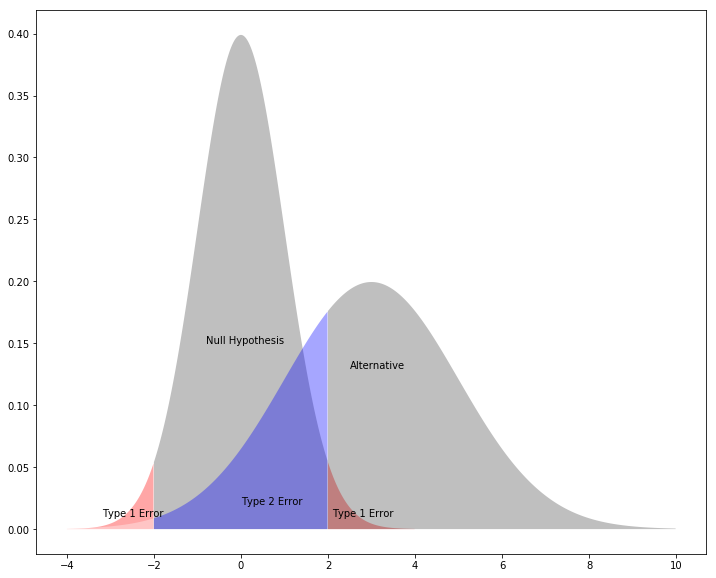

In [22]:
plt.figure(figsize=(12,10))

plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01), 
                 y1= stats.norm.pdf(np.arange(-2,2,0.01)) ,
                 facecolor='gray',
                 alpha=0.50)

plt.fill_between(x=np.arange(2,4,0.01), 
                 y1= stats.norm.pdf(np.arange(2,4,0.01)) ,
                 facecolor='red',
                 alpha=0.5)

plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01),loc=3, scale=2) ,
                 facecolor='white',
                 alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01), 
                 y1= stats.norm.pdf(np.arange(-2,2,0.01),loc=3, scale=2) ,
                 facecolor='blue',
                 alpha=0.35)

plt.fill_between(x=np.arange(2,10,0.01), 
                 y1= stats.norm.pdf(np.arange(2,10,0.01),loc=3, scale=2),
                 facecolor='gray',
                 alpha=0.50)

plt.text(x=-0.8, y=0.15, s= "Null Hypothesis")
plt.text(x=2.5, y=0.13, s= "Alternative")
plt.text(x=2.1, y=0.01, s= "Type 1 Error")
plt.text(x=-3.2, y=0.01, s= "Type 1 Error")
plt.text(x=0, y=0.02, s= "Type 2 Error")

Na plotagem acima, as áreas vermelhas indicam erros do tipo I, assumindo que a hipótese alternativa não é diferente da nula para um teste bilateral com um nível de confiança de 95%.
A área azul representa erros do tipo II que ocorrem quando a hipótese alternativa é diferente da nula, conforme mostrado pela distribuição à direita. Observe que a taxa de erro do Tipo II é a área sob a distribuição alternativa nos quantis determinada pela distribuição nula e pelo nível de confiança. Podemos calcular a taxa de erro do tipo II para as distribuições acima, como segue:

In [17]:
lower_quantile = stats.norm.ppf(0.025)  # Lower cutoff value
upper_quantile = stats.norm.ppf(0.975)  # Upper cutoff value

# Area under alternative, to the left the lower cutoff value
low = stats.norm.cdf(lower_quantile,    
                     loc=3,             
                     scale=2)

# Area under alternative, to the left the upper cutoff value
high = stats.norm.cdf(upper_quantile, 
                      loc=3, 
                      scale=2)          

# Area under the alternative, between the cutoffs (Type II error)
high-low

0.294956061112323

Com as distribuições normais acima, não poderíamos rejeitar a hipótese nula em cerca de 30% do tempo, porque as distribuições são próximas o bastante, o que significa que elas têm uma sobreposição significativa.